<a href="https://colab.research.google.com/github/jiweigang1/deep-learning-newbie/blob/main/Pytorch_%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.5.1+cu121'

In [ ]:
data = pd.read_csv('/content/sample_data/data.csv')

In [ ]:
data.head()

,years,salary
0,1,7
1,2,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   years   2 non-null      int64
 1   salary  2 non-null      int64
dtypes: int64(2)
memory usage: 164.0 bytes


Text(0, 0.5, 'salary')

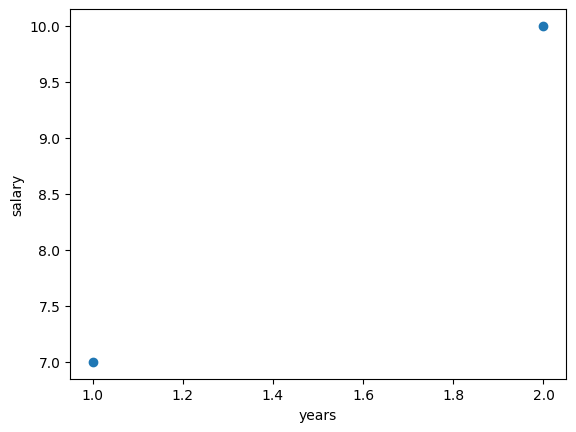

In [ ]:
plt.scatter(data.years,data.salary)
plt.xlabel('years')
plt.ylabel('salary')

In [ ]:
X = torch.from_numpy(data.years.values.reshape(-1,1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.salary.values.reshape(-1,1)).type(torch.FloatTensor)

In [ ]:
X.shape

torch.Size([2, 1])

In [ ]:
Y.shape

torch.Size([2, 1])

In [ ]:
from  torch import nn
class ELModel(nn.Module):
  def __init__(self):
    super(ELModel,self).__init__()
    self.linner = nn.Linear(1,1)
  def forward(self,x):
    return self.linner(x)


In [ ]:
model = ELModel()

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
opt = torch.optim.SGD(model.parameters(),lr=0.001)

In [ ]:
for epoch in range(1000):
  for x,y in zip(X,Y):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    opt.zero_grad()
    loss.backward()
    opt.step()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[3.5913]], requires_grad=True),
 Parameter containing:
 tensor([3.0419], requires_grad=True)]

In [ ]:
model.linner.weight, model.linner.bias

(Parameter containing:
 tensor([[3.5913]], requires_grad=True),
 Parameter containing:
 tensor([3.0419], requires_grad=True))

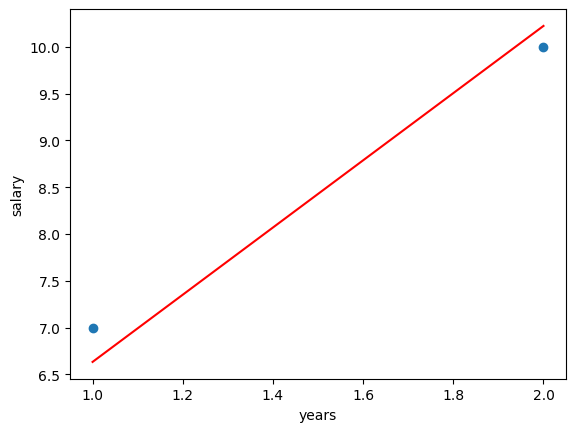

In [ ]:
#绘制散点图
plt.scatter(data.years,data.salary)
#设置 X 坐标名称
plt.xlabel('years')
#设置 Y 坐标名称
plt.ylabel('salary')
#绘制直线图
#X轴 使用训练数据
#Y轴 使用预测出的数据，预测结果为一个 tensor ，从计算图分离出来并转换为 numpy 数组，用作绘图
#设置线的颜色为红色
plt.plot(data.years,model(X).detach().numpy(),c='r')